In [19]:
import pandas as pd
import numpy as np

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [21]:
df = pd.read_csv("data.csv")

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df = df[['gender','tenure','MonthlyCharges','TotalCharges','Churn']]

In [24]:
df.isna().sum()

gender            0
tenure            0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
 4   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB


In [26]:
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df['Churn'] = np.where(df['Churn'] == 'No', 0, 1)

In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float32')
df['TotalCharges'] = df['TotalCharges'].round(2)

In [34]:
df.head()

,gender,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.850000,0
1,1,34,56.95,1889.500000,0
2,1,2,53.85,108.150002,1
3,1,45,42.30,1840.750000,0
4,0,2,70.70,151.649994,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[: , -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.01070694, -0.70530966,  1.20633639, -0.36468237],
       [-1.01070694,  0.10805109, -0.09554372, -0.08386411],
       [ 0.98940648,  1.61276849, -0.13378541,  0.99437482],
       ...,
       [-1.01070694, -0.54263751,  0.72748393, -0.31758261],
       [ 0.98940648,  1.49076438, -0.376537  ,  0.66705033],
       [-1.01070694,  0.10805109, -1.52046231, -0.7337439 ]])

#### Here also we have glorot normal, glorot Uniform  &&& He normal, He Uniform

In [43]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=4, kernel_initializer='glorot_normal'))
model.add(Dense(8, activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='glorot_normal'))

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [46]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7294 - loss: 0.5983 - val_accuracy: 0.7187 - val_loss: 0.5947
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7378 - loss: 0.5759 - val_accuracy: 0.7187 - val_loss: 0.5944
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7334 - loss: 0.5812 - val_accuracy: 0.7187 - val_loss: 0.5973
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7328 - loss: 0.5818 - val_accuracy: 0.7187 - val_loss: 0.5942
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7262 - loss: 0.5875 - val_accuracy: 0.7187 - val_loss: 0.5942
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7357 - loss: 0.5778 - val_accuracy: 0.7187 - val_loss: 0.5942
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7486 - loss: 0.5655 - val_accuracy: 0.7187 - val_loss: 0.5964
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7383 - loss: 0.5753 - val_ac

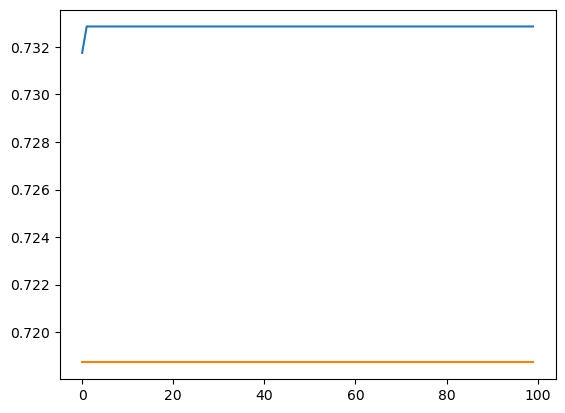

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')